In [36]:
import numpy as np
import pandas as pd

case_types = ['batched_jit', 'batched_nojit', 'nobatch_jit']
backends = ['cpu', 'gpu']

cases = [f'{t}_{b}' for t in case_types for b in backends]

case_types_unrolled = []
backends_unrolled = []
call_types = []
call_dofs = []
call_times = []
for t, b in [(t, b) for t in case_types for b in backends]:
    filestem = f'./batched_jit_study_data/test_fea_scaling_{t}_{b}_'
    call_dofs.append(np.load(f'{filestem}first_call_x.npy'))
    call_times.append(np.load(f'{filestem}first_call_y.npy'))
    call_types.extend(['first_call'] * call_dofs[-1].shape[0])
    case_types_unrolled.extend([t] * call_dofs[-1].shape[0])
    backends_unrolled.extend([b] * call_dofs[-1].shape[0])
    call_dofs.append(np.load(f'{filestem}subseq_call_x.npy'))
    call_times.append(np.load(f'{filestem}subseq_call_y.npy'))
    call_types.extend(['subsequent_call'] * call_dofs[-1].shape[0])
    case_types_unrolled.extend([t] * call_dofs[-1].shape[0])
    backends_unrolled.extend([b] * call_dofs[-1].shape[0])

call_dofs = np.hstack(call_dofs)
call_times = np.hstack(call_times)

timing_data = pd.DataFrame({'case': case_types_unrolled, 'backend': backends_unrolled, 'call_type': call_types, 'dofs': call_dofs, 'time': call_times})

c:\Users\ballarmk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


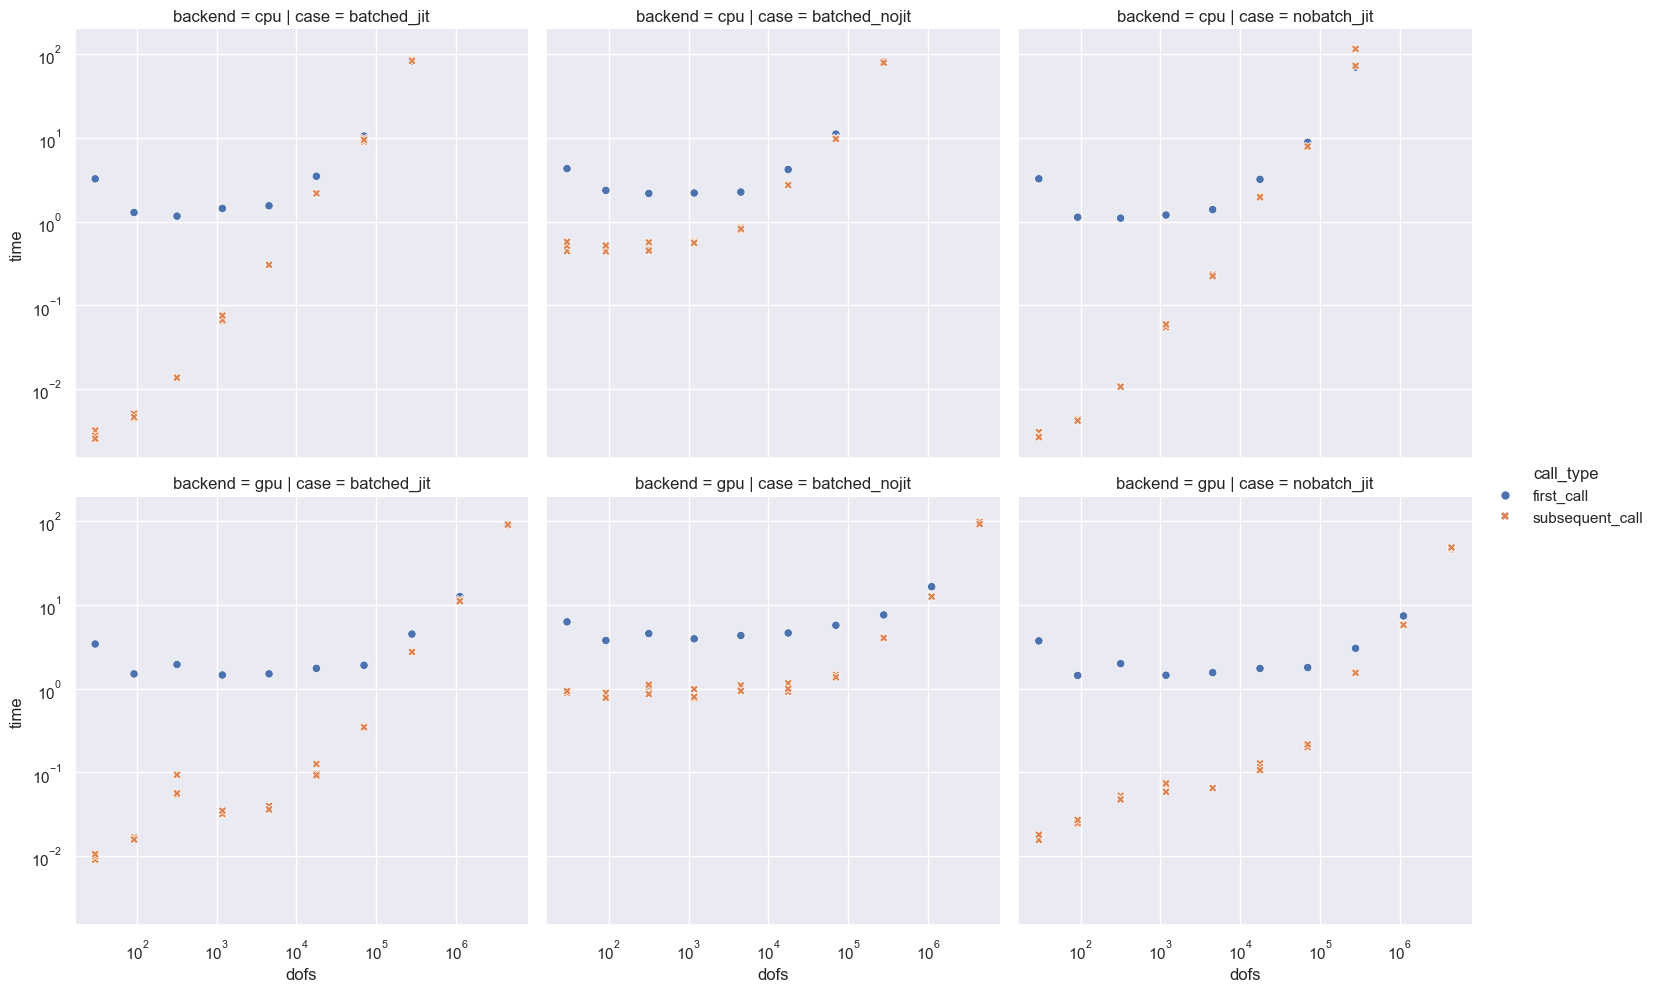

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.relplot(
    data=timing_data,
    x="dofs", y="time", row="backend", col="case",
    hue="call_type", style="call_type",
)
plt.xscale('log')
plt.yscale('log')

In [ ]:
sns.relplot(
    data=timing_data,
    x="dofs", y="time", row="case", col="backend",
    hue="call_type", style="call_type",
)
plt.xscale('log')
plt.yscale('log')